In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [8]:
np.random.seed(0)
X, y  = make_moons(400, noise=0.1)

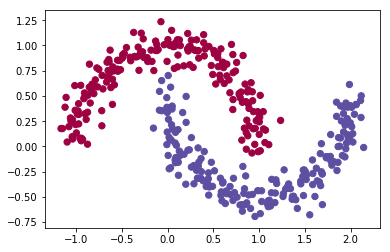

In [9]:
plt.scatter(X[:,0], X[:,1], s = 40, c = y, cmap = plt.cm.Spectral)

In [10]:
clf = LogisticRegression()
clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
def plot_decision_boundary(pred_func):
    x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
    h = 0.01
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx,yy,Z,cmap=plt.cm.Spectral)
    plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Spectral)

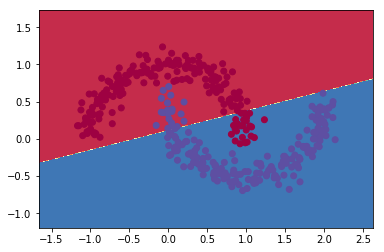

In [12]:
plot_decision_boundary(lambda x : clf.predict(x))

# Neural Networks

In [17]:
num_examples = len(X)
nn_input_dim = 2
nn_output_dim = 2

learning_rate = 0.01
reg_lambda = 0.01

In [18]:
def calculate_loss(model):
    W1,b1,W2,b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    # forward propagation
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1,keepdims=True)
    
    # Calculating the loss
    correct_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(correct_logprobs)
    
    return 1. / num_examples * data_loss

In [19]:
def predict(model, x):
    W1,b1,W2,b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    # forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1,keepdims=True)
    
    return np.argmax(probs, axis = 1)

In [20]:
def build_model(hidden_layer, nb_epoch, print_loss = False):
    
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, hidden_layer)
    b1 = np.zeros((1, hidden_layer))
    W2 = np.random.randn(hidden_layer, nn_output_dim)
    b2 = np.zeros((1, nn_output_dim))
    
    model = {}
    
    for i in range(nb_epoch):
        
        # forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1,keepdims=True)
        
        # Backpropagation
        delta3 = probs
        delta3[range(num_examples),y] -= 1
        delta_W2 = (a1.T).dot(delta3)
        delta_b2 = np.sum(delta3, axis = 0, keepdims=True)
        
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1,2))
        delta_W1 = np.dot(X.T, delta2)
        delta_b1 = np.sum(delta2, axis = 0)
        
        # Adding regularization
        delta_W2 += reg_lambda * W2
        delta_W1 += reg_lambda * W1
        
        # Gradient Descent parameter update
        W1 += -learning_rate * delta_W1
        b1 += -learning_rate * delta_b1
        W2 += -learning_rate * delta_W2
        b2 += -learning_rate * delta_b2
        
        model = {'W1':W1,'b1':b1,'W2':W2,'b2':b2}
        
        if print_loss and i % 1000 == 0:
            print("Loss after iteration %i : %f"%(i, calculate_loss(model)))
    
    return model

Loss after iteration 0 : 0.343584
Loss after iteration 1000 : 0.001756
Loss after iteration 2000 : 0.001147
Loss after iteration 3000 : 0.000967
Loss after iteration 4000 : 0.000893
Loss after iteration 5000 : 0.000859
Loss after iteration 6000 : 0.000842
Loss after iteration 7000 : 0.000832
Loss after iteration 8000 : 0.000827
Loss after iteration 9000 : 0.000824
Loss after iteration 10000 : 0.000822
Loss after iteration 11000 : 0.000820
Loss after iteration 12000 : 0.000820
Loss after iteration 13000 : 0.000819
Loss after iteration 14000 : 0.000818
Loss after iteration 15000 : 0.000818
Loss after iteration 16000 : 0.000818
Loss after iteration 17000 : 0.000817
Loss after iteration 18000 : 0.000817
Loss after iteration 19000 : 0.000817


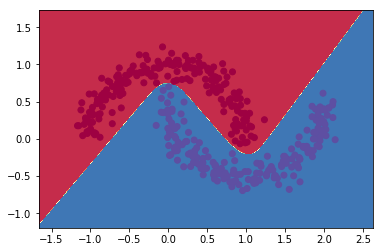

In [21]:
# Network with hidden layer of size 3

model = build_model(3,20000, print_loss=True)

# plot decision boundary
plot_decision_boundary(lambda x : predict(model,x))